In [1]:
import pandas as pd

# Load data from a text file
!python -m wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv
df_students = pd.read_csv('grades.csv',delimiter=',',header='infer')

# Remove any rows with missing data
df_students = df_students.dropna(axis=0, how='any')

# Calculate who passed, assuming '60' is the grade needed to pass
passes  = pd.Series(df_students['Grade'] >= 60)

# Save who passed to the Pandas dataframe
df_students = pd.concat([df_students, passes.rename("Pass")], axis=1)


# Print the result out into this notebook
df_students 


Saved under grades (2).csv


,Name,StudyHours,Grade,Pass
0,Dan,10.00,50.0,False
1,Joann,11.50,50.0,False
2,Pedro,9.00,47.0,False
3,Rosie,16.00,97.0,True
4,Ethan,9.25,49.0,False
5,Vicky,1.00,3.0,False
6,Frederic,11.50,53.0,False
7,Jimmie,9.00,42.0,False
8,Rhonda,8.50,26.0,False
9,Giovanni,14.50,74.0,True


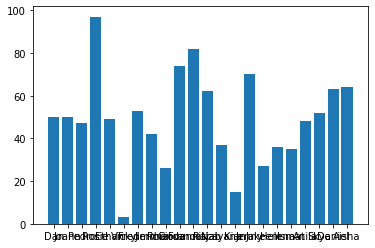

In [2]:
# Ensure plots are displayed inline in the notebook
%matplotlib inline

from matplotlib import pyplot as plt

# Create a bar plot of name vs grade
plt.bar(x=df_students.Name, height=df_students.Grade)

# Display the plot
plt.show()

<AxesSubplot:>

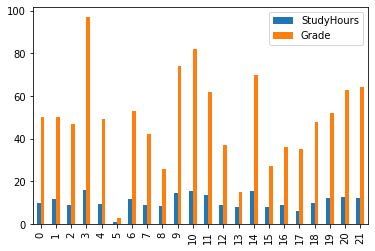

In [3]:
df_students.plot.bar()

<AxesSubplot:xlabel='Name'>

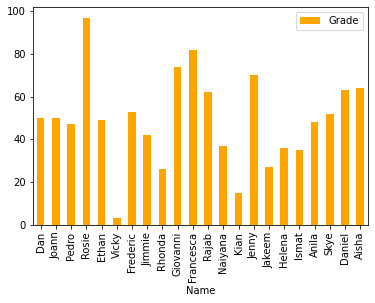

In [4]:
# or
df_students.plot.bar(x='Name', y='Grade', color='orange')

<AxesSubplot:>

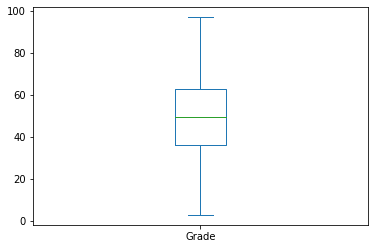

In [5]:
df_students.Grade.plot.box()

<AxesSubplot:ylabel='Density'>

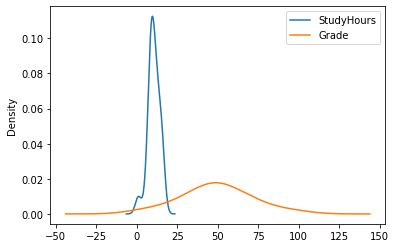

In [6]:
df_students.plot.density()

<AxesSubplot:ylabel='Density'>

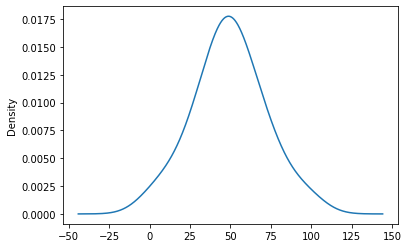

In [7]:
df_students.Grade.plot.density()

<AxesSubplot:>

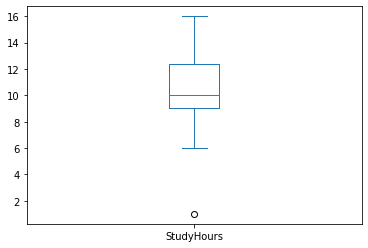

In [8]:
df_students.StudyHours.plot.box()

<AxesSubplot:ylabel='Density'>

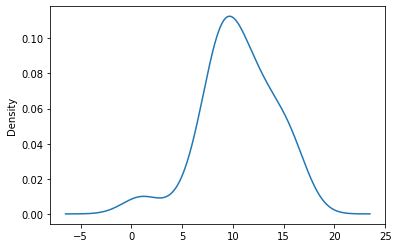

In [9]:
df_students.StudyHours.plot.density()

<AxesSubplot:title={'center':'StudyHours'}, xlabel='Pass'>

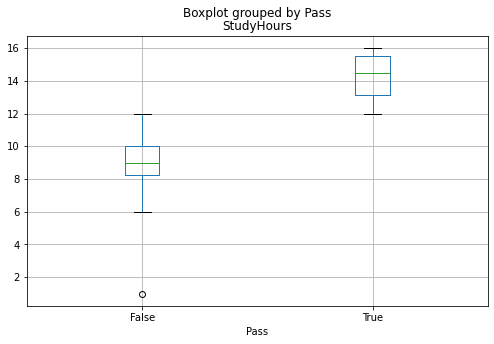

In [10]:
df_students.boxplot(column='StudyHours', by='Pass', figsize=(8,5))

In [11]:
## you can scale multiple numerical values so that they can be plotted on the same scale

<AxesSubplot:xlabel='Name'>

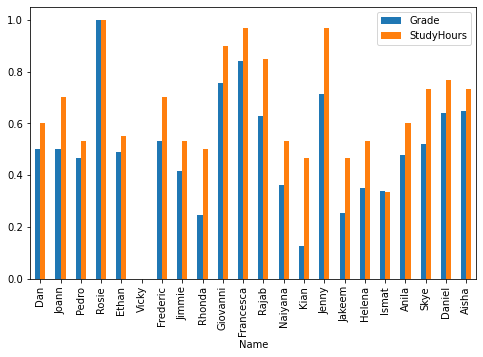

In [12]:
from sklearn.preprocessing import MinMaxScaler

# Get a scaler object
scaler = MinMaxScaler()

# Create a new dataframe for the scaled values
df_normalized = df_students[['Name', 'Grade', 'StudyHours']].copy()

# Normalize the numeric columns
df_normalized[['Grade','StudyHours']] = scaler.fit_transform(df_normalized[['Grade','StudyHours']])

# Plot the normalized values
df_normalized.plot(x='Name', y=['Grade','StudyHours'], kind='bar', figsize=(8,5))

In [13]:
df_normalized.Grade.corr(df_normalized.StudyHours)

0.9254280509006746

<AxesSubplot:title={'center':'Study Time vs Grade'}, xlabel='StudyHours', ylabel='Grade'>

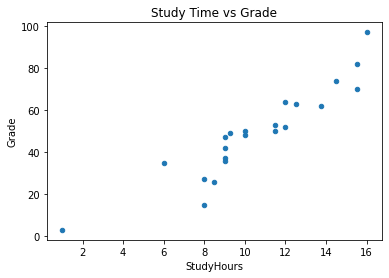

In [14]:
df_students.plot.scatter(title='Study Time vs Grade', x='StudyHours', y='Grade')

In [15]:
from scipy import stats
help(stats.linregress)

Help on function linregress in module scipy.stats._stats_mstats_common:

linregress(x, y=None, alternative='two-sided')
    Calculate a linear least-squares regression for two sets of measurements.
    
    Parameters
    ----------
    x, y : array_like
        Two sets of measurements.  Both arrays should have the same length.  If
        only `x` is given (and ``y=None``), then it must be a two-dimensional
        array where one dimension has length 2.  The two sets of measurements
        are then found by splitting the array along the length-2 dimension. In
        the case where ``y=None`` and `x` is a 2x2 array, ``linregress(x)`` is
        equivalent to ``linregress(x[0], x[1])``.
    alternative : {'two-sided', 'less', 'greater'}, optional
        Defines the alternative hypothesis. Default is 'two-sided'.
        The following options are available:
    
        * 'two-sided': the slope of the regression line is nonzero
        * 'less': the slope of the regression line is l

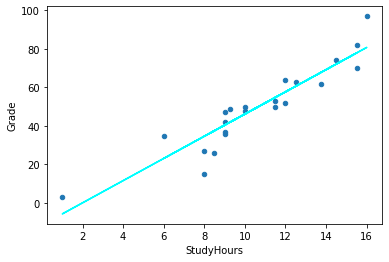

In [16]:
# scatterplot with regression line
from scipy import stats
df_regression = df_students[['Grade', 'StudyHours']].copy()
res = stats.linregress(df_regression['StudyHours'], df_regression['Grade'])
df_regression['fx'] = (res.slope * df_regression['StudyHours']) + res.intercept  # y = mx + b
df_regression.plot.scatter(x='StudyHours', y='Grade')
plt.plot(df_regression['StudyHours'],df_regression['fx'], color='cyan')
plt.show()

In [17]:
df_students['Grade'].mean()

49.18181818181818

(-8.0, 25.0, -0.005623729704048909, 0.11817216157601976)

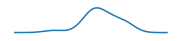

In [18]:
# short density plot for col headers
plt = df_students.StudyHours.plot.density(figsize=(3,0.5))
plt.axis('off')

In [19]:
import seaborn as sns

<AxesSubplot:xlabel='StudyHours', ylabel='Count'>

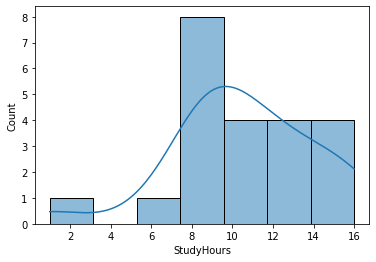

In [20]:
sns.histplot(df_students.StudyHours, kde=True)

(-5.951536203338648, 22.951536203338648, 0.0, 0.11815800167465526)

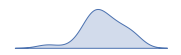

In [21]:
sns.set(rc={'figure.figsize':(3, 0.75)})
plt = sns.kdeplot(df_students.StudyHours, fill=True)
plt.axis('off')

In [23]:
df = df_students

In [24]:
df

,Name,StudyHours,Grade,Pass
0,Dan,10.00,50.0,False
1,Joann,11.50,50.0,False
2,Pedro,9.00,47.0,False
3,Rosie,16.00,97.0,True
4,Ethan,9.25,49.0,False
5,Vicky,1.00,3.0,False
6,Frederic,11.50,53.0,False
7,Jimmie,9.00,42.0,False
8,Rhonda,8.50,26.0,False
9,Giovanni,14.50,74.0,True


In [27]:
round(df["Grade"].min(),3)

3.0